# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
import pandas as pd
import re
import nltk
from collections import defaultdict, Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

csv_url = "https://raw.githubusercontent.com/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/main/imdb_reviews.csv"
#Read the CSV file
df = pd.read_csv(csv_url)
def cleanreviews(reviews):
    reviews = re.sub(r'@[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'#[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'https?:\/\/\S+', '', reviews)
    reviews = re.sub(r"www.\S+", "", reviews)
    reviews = re.sub('[()!?]', ' ', reviews)
    reviews = re.sub('\[.*?\]', ' ', reviews)
    reviews = re.sub("[^A-Za-z0-9]", " ", reviews)
    reviews = re.sub('\\n', '', reviews)
    reviews = re.sub(r'[0-9]+', '', reviews)
    return reviews

df["review"] = df["review"].apply(cleanreviews)

texts = df["review"].values.tolist()

tokenized_texts = [nltk.word_tokenize(text) for text in texts]
print(tokenized_texts[:1])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[['I', 'had', 'the', 'rather', 'intense', 'privilege', 'to', 'view', 'James', 'Cameron', 's', 'much', 'anticipated', 'million', 'budget', 'return', 'to', 'the', 'directing', 'scene', 'Avatar', 'at', 'the', 'Empire', 'Leicester', 'Square', 'in', 'London', 'Where', 'to', 'begin', 'The', 'visuals', 'in', 'this', 'pieces', 'was', 'groundbreaking', 'He', 'did', 'it', 'with', 'the', 'Terminator', 'series', 'and', 'then', 'Titanic', 'so', 'one', 'would', 'expect', 'Cameron', 'to', 'deliver', 'and', 'HE', 'DID', 'The', 'visual', 'are', 'by', 'far', 'some', 'of', 'the', 'sharpest', 'CGI', 'I', 'have', 'seen', 'You', 'could', 'almost', 'say', 'that', 'there', 'is', 'a', 'disquiet', 'that', 'follows', 'Cameron', 's', 'soul', 'as', 'there', 'is', 'no', 'other', 'possibility', 'of', 'this', 'strong', 'and', 'intensified', 'quality', 'Its', 'production', 'design', 'and', 'visual', 'effects', 'are', 'both', 'noteworthy', 'and', 'it', 'will', 'get', 'its', 'praise', 'upon', 'official', 'release', 'Wha

In [ ]:
def count_ngrams(tokenized_texts, n):
    ngrams = defaultdict(int)
    for tokens in tokenized_texts:
        for i in range(len(tokens) - n + 1):
            ngram = tuple(tokens[i:i + n])
            ngrams[ngram] += 1
    return ngrams

trigram_counts = count_ngrams(tokenized_texts, 3)

print(list(trigram_counts.items())[:10])


[(('I', 'had', 'the'), 8), (('had', 'the', 'rather'), 1), (('the', 'rather', 'intense'), 1), (('rather', 'intense', 'privilege'), 1), (('intense', 'privilege', 'to'), 1), (('privilege', 'to', 'view'), 1), (('to', 'view', 'James'), 1), (('view', 'James', 'Cameron'), 2), (('James', 'Cameron', 's'), 112), (('Cameron', 's', 'much'), 2)]


In [ ]:
def count_bigrams(tokenized_texts):
    bigrams = defaultdict(int)
    unigram_counts = defaultdict(int)

    for tokens in tokenized_texts:
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i + 1])
            bigrams[bigram] += 1
            unigram_counts[tokens[i]] += 1
        unigram_counts[tokens[-1]] += 1

    return bigrams, unigram_counts

bigram_counts, unigram_counts = count_bigrams(tokenized_texts)
bigram_probabilities = {bigram: count / unigram_counts[bigram[0]] for bigram, count in bigram_counts.items()}
print(list(bigram_probabilities.items())[:10])

[(('I', 'had'), 0.021970233876683204), (('had', 'the'), 0.0759493670886076), (('the', 'rather'), 0.0005385351842987075), (('rather', 'intense'), 0.008928571428571428), (('intense', 'privilege'), 0.05555555555555555), (('privilege', 'to'), 0.75), (('to', 'view'), 0.0012160518848804217), (('view', 'James'), 0.034482758620689655), (('James', 'Cameron'), 0.871313672922252), (('Cameron', 's'), 0.19421487603305784)]


In [ ]:
from nltk import pos_tag
from nltk.chunk import RegexpParser

def extract_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    tagged = pos_tag(tokens)
    chunker = RegexpParser(r'NP: {<DT>?<JJ>*<NN>}')
    tree = chunker.parse(tagged)
    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            phrase = ' '.join(word for word, tag in subtree.leaves())
            noun_phrases.append(phrase)
    return noun_phrases

noun_phrases = [extract_noun_phrases(review) for review in texts]
all_noun_phrases = [phrase for sublist in noun_phrases for phrase in sublist]
noun_phrase_counts = Counter(all_noun_phrases)
max_noun_phrase_count = max(noun_phrase_counts.values())

relative_probabilities = []
for review_phrases in noun_phrases:
    review_probs = {phrase: noun_phrase_counts[phrase] / max_noun_phrase_count for phrase in review_phrases}
    relative_probabilities.append(review_probs)
print(relative_probabilities[:1])


[{'intense privilege': 0.001177856301531213, 'budget': 0.03180212014134275, 'return': 0.009422850412249705, 'scene': 0.07773851590106007, 'series': 0.024734982332155476, 'The visual': 0.001177856301531213, 'CGI': 0.004711425206124852, 's soul': 0.0035335689045936395, 'no other possibility': 0.001177856301531213, 'intensified quality': 0.001177856301531213, 'production': 0.03180212014134275, 'design': 0.023557126030624265, 'praise': 0.016489988221436984, 'official release': 0.001177856301531213, 'the movie': 1.0, 'character story': 0.001177856301531213, 'believable plot': 0.001177856301531213, 'a movie': 0.37809187279151946, 'fantasy': 0.0353356890459364, 'exploration': 0.002355712603062426, 'outer': 0.002355712603062426, 'this factor': 0.002355712603062426, 'a vote': 0.002355712603062426, 'a success': 0.004711425206124852, 's': 0.6030624263839811, 'legacy': 0.002355712603062426, 'viral marketing': 0.001177856301531213, 'a powerful marketing': 0.001177856301531213, 'technique': 0.008244

In [ ]:
unique_noun_phrases = list(noun_phrase_counts.keys())
probability_df = pd.DataFrame(columns=unique_noun_phrases)
for i, review_probs in enumerate(relative_probabilities):
    row = pd.DataFrame([review_probs], columns=unique_noun_phrases)
    probability_df = pd.concat([probability_df, row], ignore_index=True)
print(probability_df.head())

<ipython-input-10-cd02fea0622e>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  probability_df = pd.concat([probability_df, row], ignore_index=True)


   intense privilege    budget    return     scene    series  The visual  \
0           0.001178  0.031802  0.009423  0.077739  0.024735    0.001178   
1                NaN       NaN       NaN       NaN       NaN         NaN   
2                NaN       NaN       NaN       NaN       NaN         NaN   
3                NaN       NaN       NaN       NaN       NaN         NaN   
4                NaN       NaN       NaN  0.077739       NaN         NaN   

        CGI    s soul  no other possibility  intensified quality  ...  \
0  0.004711  0.003534              0.001178             0.001178  ...   
1       NaN       NaN                   NaN                  NaN  ...   
2       NaN       NaN                   NaN                  NaN  ...   
3       NaN       NaN                   NaN                  NaN  ...   
4       NaN       NaN                   NaN                  NaN  ...   

   overseas interest  No doubt  a real goddess  The rating  Another group  \
0                NaN       

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [8]:
import pandas as pd
import re
import math
from collections import defaultdict, Counter
import numpy as np

csv_url = "https://raw.githubusercontent.com/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/main/imdb_reviews.csv"
#Read the CSV file
df = pd.read_csv(csv_url)

def cleanreviews(reviews):
    reviews = re.sub(r'@[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'#[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'https?:\/\/\S+', '', reviews)
    reviews = re.sub(r"www.\S+", "", reviews)
    reviews = re.sub('[()!?]', ' ', reviews)
    reviews = re.sub('\[.*?\]', ' ', reviews)
    reviews = re.sub("[^A-Za-z0-9]", " ", reviews)
    reviews = re.sub('\\n', '', reviews)
    reviews = re.sub(r'[0-9]+', '', reviews)
    return reviews

df["review"] = df["review"].apply(cleanreviews)
texts = df["review"].values.tolist()
tokenized_texts = [text.lower().split() for text in texts]

def compute_tf(text):
    tf_dict = {}
    n = len(text)
    term_counts = Counter(text)
    for term, count in term_counts.items():
        tf_dict[term] = count / n
    return tf_dict

def compute_idf(tokenized_texts):
    N = len(tokenized_texts)
    idf_dict = defaultdict(int)
    for text in tokenized_texts:
        for term in set(text):
            idf_dict[term] += 1
    for term, count in idf_dict.items():
        idf_dict[term] = math.log(N / (1 + count))
    return idf_dict

tf_list = [compute_tf(text) for text in tokenized_texts]
idf_dict = compute_idf(tokenized_texts)

def compute_tfidf(tf_dict, idf_dict):
    tfidf_dict = {}
    for term, tf_value in tf_dict.items():
        tfidf_dict[term] = tf_value * idf_dict[term]
    return tfidf_dict
tfidf_list = [compute_tfidf(tf, idf_dict) for tf in tf_list]
vocabulary = list(idf_dict.keys())
tfidf_matrix = np.zeros((len(tokenized_texts), len(vocabulary)))

for i, tfidf in enumerate(tfidf_list):
    for term, value in tfidf.items():
        if term in vocabulary:
            tfidf_matrix[i, vocabulary.index(term)] = value

print("checking rows",tfidf_matrix[:5])


checking rows [[0.00463464 0.00575108 0.01833328 ... 0.         0.         0.        ]
 [0.         0.00275176 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00102558 0.00318159 0.         ... 0.         0.         0.        ]
 [0.00731918 0.         0.         ... 0.         0.         0.        ]]


In [9]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)
query = "A deeply moving story with exceptional acting and powerful themes"
query = cleanreviews(query).lower().split()
query_tf = compute_tf(query)
query_tfidf = compute_tfidf(query_tf, idf_dict)
query_vector = np.zeros(len(vocabulary))
for term, value in query_tfidf.items():
    if term in vocabulary:
        query_vector[vocabulary.index(term)] = value

cosine_similarities = []
for tfidf_vector in tfidf_matrix:
    cosine_similarities.append(cosine_similarity(tfidf_vector, query_vector))
ranked_docs = np.argsort(cosine_similarities)[::-1]
print("Top 5 ranked documents:")
for idx in ranked_docs[:5]:
    print(f"Document {idx+1}: {texts[idx][:100]}... (Score: {cosine_similarities[idx]})")


Top 5 ranked documents:
Document 633: Even critics of action and science fiction movies would be hard pressed to not like this film  The s... (Score: 0.17284873473610732)
Document 306: I have to admit that this was the One Film that I went in expecting alot  I usually don t do that  b... (Score: 0.15647860907476632)
Document 793: This is movie making at its finest  A beautiful heartfelt message  loveable characters from a range ... (Score: 0.11994415126352542)
Document 805: The film s plot centers around a paraplegic Marine  Worthington  who is dispatched to Pandora on a u... (Score: 0.11731407471616309)
Document 738: I ve always loved fairy tales     however never have I expected to be actually able to take a part i... (Score: 0.09612037246280562)


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here
!pip install scikit-learn


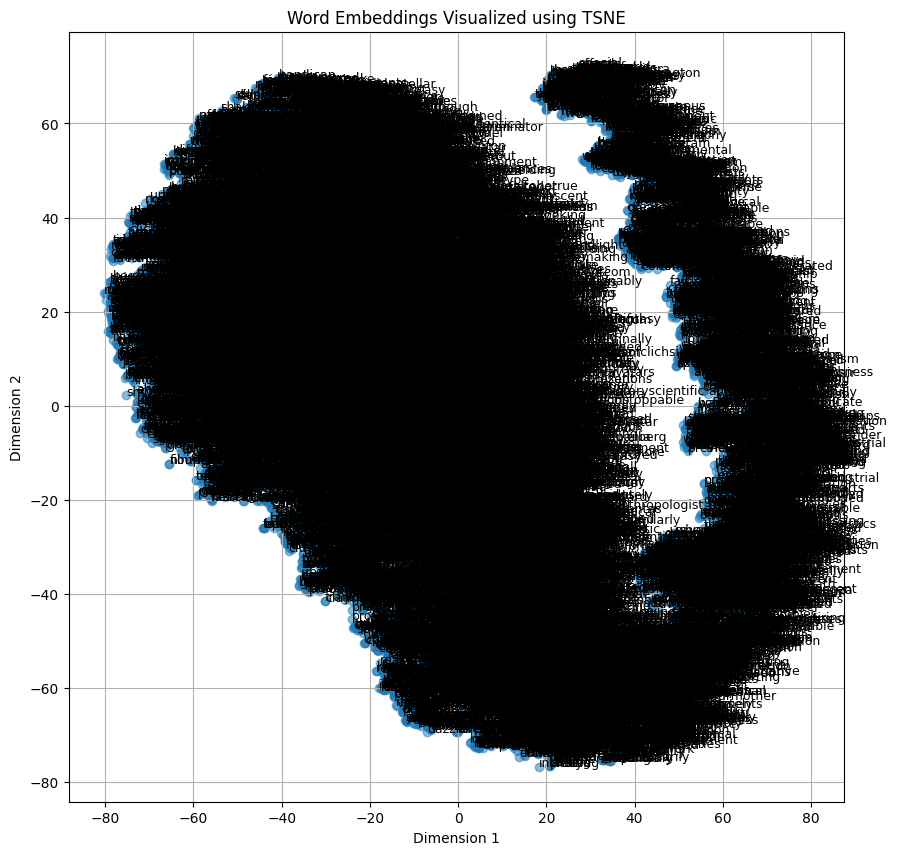

In [ ]:
import pandas as pd
import re
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

csv_url = "https://raw.githubusercontent.com/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/main/imdb_reviews.csv"
#Read the CSV file
df = pd.read_csv(csv_url)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text.split()

tokenized_reviews = df['review'].apply(preprocess_text).tolist()
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)
word2vec_model.save("imdb_word2vec.model")
words = list(word2vec_model.wv.index_to_key)
word_vectors = np.array([word2vec_model.wv[word] for word in words])
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)
plt.title('Word Embeddings Visualized using TSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid()
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file
https://github.com/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/blob/main/imdb_reviews_sentiment_analysis.csv

# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
I understand the concepts of NLP and its techniques. Initially It took time to understand the coding part but I understood the theory well in it
. Time taken for the coding part is more and the best thing I learn is about how to play with datasets in python.
Got to know about the NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation and sentiment analysis dataset creation.